<a href="https://colab.research.google.com/github/ccapelo8/learning-pytorch/blob/main/Pytorch_by_freeCodeCamp_Chapters_0_%26_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Disclaimer: This is just what I've deemed useful form the Pytorch by freeCodeCamp course, for the whole resource check [Youtube link](https://www.youtube.com/watch?v=V_xro1bcAuA)

#CHAPTER 0

# **25. Reshaping, viewing and stacking**

In [1]:
import torch

x = torch.arange(1.,10.)
x, x.shape

(tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.]), torch.Size([9]))

RESHAPE, add an extra dimension

In [2]:
x_reshaped = x.reshape(1, 9)
x_reshaped, x_reshaped.shape

(tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]]), torch.Size([1, 9]))

Change the VIEW

In [3]:
z = x.view(1,9)
z,x,z.shape

(tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]]),
 tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 torch.Size([1, 9]))

If we change z, x changes because they share the same memory

In [4]:
z = x.view(1,9)
z[:,0] = 8
z,x

(tensor([[8., 2., 3., 4., 5., 6., 7., 8., 9.]]),
 tensor([8., 2., 3., 4., 5., 6., 7., 8., 9.]))

Stack tensors on top of each other

In [5]:
x_stacked = torch.stack([x,x,x,x], dim = 0)
print(x_stacked)

x_stacked = torch.stack([x,x,x,x], dim = 1)
print(x_stacked)

tensor([[8., 2., 3., 4., 5., 6., 7., 8., 9.],
        [8., 2., 3., 4., 5., 6., 7., 8., 9.],
        [8., 2., 3., 4., 5., 6., 7., 8., 9.],
        [8., 2., 3., 4., 5., 6., 7., 8., 9.]])
tensor([[8., 8., 8., 8.],
        [2., 2., 2., 2.],
        [3., 3., 3., 3.],
        [4., 4., 4., 4.],
        [5., 5., 5., 5.],
        [6., 6., 6., 6.],
        [7., 7., 7., 7.],
        [8., 8., 8., 8.],
        [9., 9., 9., 9.]])


There's also hstack and vstack which work a bit different.

# **26. Squeezing, unsqueezing and permuting**

Squeezing: removing all single dimensions from a target tensor

In [6]:
print(f"Previous tensor: {x_reshaped}")
print(f"Previous shape: {x_reshaped.shape}")

#Remove extra dimension from x_reshaped
x_squeezed = x_reshaped.squeeze()
print(f"\nNew tensor: {x_squeezed}")
print(f"New Shape: {x_squeezed.shape}")

Previous tensor: tensor([[8., 2., 3., 4., 5., 6., 7., 8., 9.]])
Previous shape: torch.Size([1, 9])

New tensor: tensor([8., 2., 3., 4., 5., 6., 7., 8., 9.])
New Shape: torch.Size([9])


In [7]:
print(f"Previous target: {x_squeezed}")
print(f"Previous shape: {x_squeezed.shape}")

#Adding an extra dim

x_unsqueezed = x_squeezed.unsqueeze(dim=0)
print(f"\nNew tensor : {x_unsqueezed}")
print(f"New shape: {x_unsqueezed.shape}")

Previous target: tensor([8., 2., 3., 4., 5., 6., 7., 8., 9.])
Previous shape: torch.Size([9])

New tensor : tensor([[8., 2., 3., 4., 5., 6., 7., 8., 9.]])
New shape: torch.Size([1, 9])


In [8]:
x_reshaped.squeeze().shape

torch.Size([9])

Permute, rearranges dims of a target tensor in a specified order

In [9]:
x_original = torch.rand(size = (224,224,3)) # An image (height, width and rgb)

#Permute the original tensor

x_permuted = x_original.permute(2,0,1)

print(f"Previous shape:{x_original.shape}")
print(f"New shape:{x_permuted.shape}")


Previous shape:torch.Size([224, 224, 3])
New shape:torch.Size([3, 224, 224])


#**29. Reproducibility**

Taking the random out of random

To reduce the randomness in NN and Pytorch -> random seed

Random seed: it "flavours" the randomness



In [10]:
random_tensor_A = torch.rand(3,4)
random_tensor_B = torch.rand(3,4)

print(random_tensor_A)
print(random_tensor_B)
print(random_tensor_A == random_tensor_B)

tensor([[0.0481, 0.7582, 0.7013, 0.0051],
        [0.5165, 0.7257, 0.0130, 0.3200],
        [0.9624, 0.3326, 0.7050, 0.9786]])
tensor([[0.5159, 0.2421, 0.3632, 0.7913],
        [0.7377, 0.6967, 0.0444, 0.1633],
        [0.1787, 0.3742, 0.5926, 0.0536]])
tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])


Setting the random seed

In [11]:
RANDOM_SEED = 42

torch.manual_seed(RANDOM_SEED)
random_tensor_C = torch.rand(3,4)

torch.manual_seed(RANDOM_SEED)
random_tensor_D = torch.rand(3,4)

print(random_tensor_C)
print(random_tensor_D)
print(random_tensor_C == random_tensor_D)

tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])


#CHAPTER 1

#**35.Creating a datasheet with linear regression**

Remember linear regression is a model such as Y = a + bX,
where **a is the intercept** and **b is the slope** (gradient)

In [12]:
import torch
from torch import nn
import matplotlib.pyplot as plt

weight = 0.7 # value of B
bias = 0.3   # value of A

start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim = 1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [13]:
len(X), len(y)

(50, 50)

#**36.Creating training and test sets**

3 datasheets:

> Training set (60%-80% of the data)

> Validation set (10%-20%) [not always used]

> Test set (10%-20%)

In [14]:
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(X_test)

(40, 10)

#**37.Building a function to visualize our data**

In [15]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  plt.figure(figsize= (10,7))

  #Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s= 4, label ="Training data")

  #Plot test data in green
  plt.scatter(train_data, train_labels, c="g", s= 4, label ="Testing data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r",s = 4, label = "Predictions")

  plt.legend(prop={"size": 14});


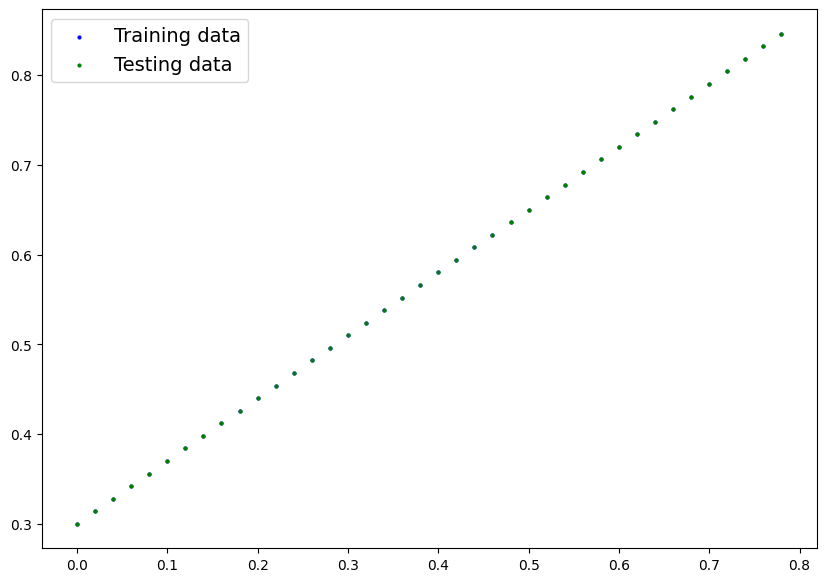

In [16]:
plot_predictions();

#**38-42.Creating our first Pytorch model**

In [17]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()

    self.weights = nn.Parameter(torch.randn(1,
                                               requires_grad= True,
                                               dtype = torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                          requires_grad = True,
                                          dtype = torch.float))

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias


Checking the contents of a PyTorch model

In [18]:
# Set manual seed since nn.Parameter are randomly initialzied
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [19]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

Making predictions with **torch.inference_mode()**

In [20]:
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds


tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [21]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

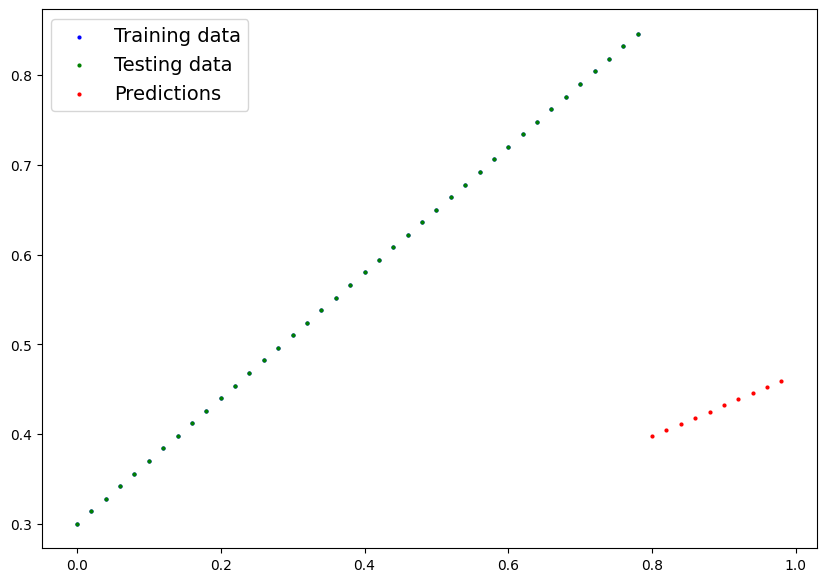

In [22]:
plot_predictions(predictions = y_preds)

#**43-50. Training & Testing a model**

Before even training we need to understand how far away our model is from being right when predicting, to calculate that we use a **loss function**, and to "get closer" we use an **optimizer**

In [23]:
loss_fn = nn.L1Loss()


optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01)


Training and testing loop

In [24]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [25]:
torch.manual_seed(42)
epochs = 200

#Tracking crucial values

epoch_count = []
loss_values = []
test_loss_values = []
for epoch in range(epochs):
  model_0.train()

  y_pred = model_0(X_train)

  loss = loss_fn(y_pred,y_train)


  optimizer.zero_grad() # with each iteration we need to clear the value of the grad, if not we will accumulate errors.

  loss.backward()

  optimizer.step()

  model_0.eval()  #turns off settings not needed for testing
  with torch.inference_mode(): # gradient turned off´
    test_pred = model_0(X_test)

    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch}  | Loss: {loss}  | Test loss: {test_loss}")
    print(model_0.state_dict())  #Remember:  weights = 0.7 and bias = 0.3


Epoch: 0  | Loss: 0.31288138031959534  | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10  | Loss: 0.1976713240146637  | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20  | Loss: 0.08908725529909134  | Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30  | Loss: 0.053148526698350906  | Test loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40  | Loss: 0.04543796554207802  | Test loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50  | Loss: 0.04167863354086876  | Test loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60  | Loss: 0.03818932920694351  | Test loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', 

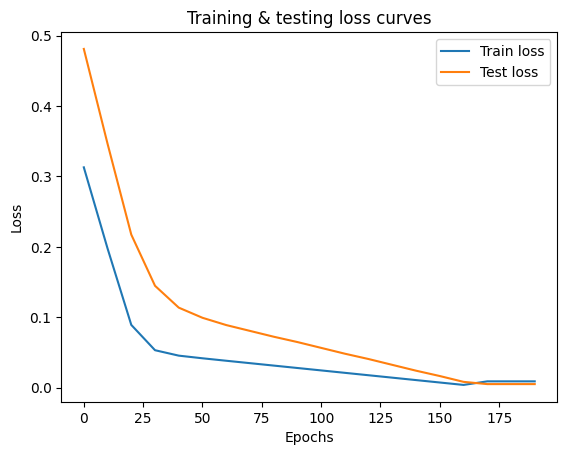

In [26]:
import numpy as np

#Plot the loss curves
plt.plot(epoch_count,np.array(torch.tensor(loss_values).numpy()), label = "Train loss")
plt.plot(epoch_count, np.array(torch.tensor(test_loss_values).numpy()), label = "Test loss")
plt.title("Training & testing loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [27]:
print(model_0.state_dict())
print(loss)

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])
tensor(0.0026, grad_fn=<MeanBackward0>)


In [28]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

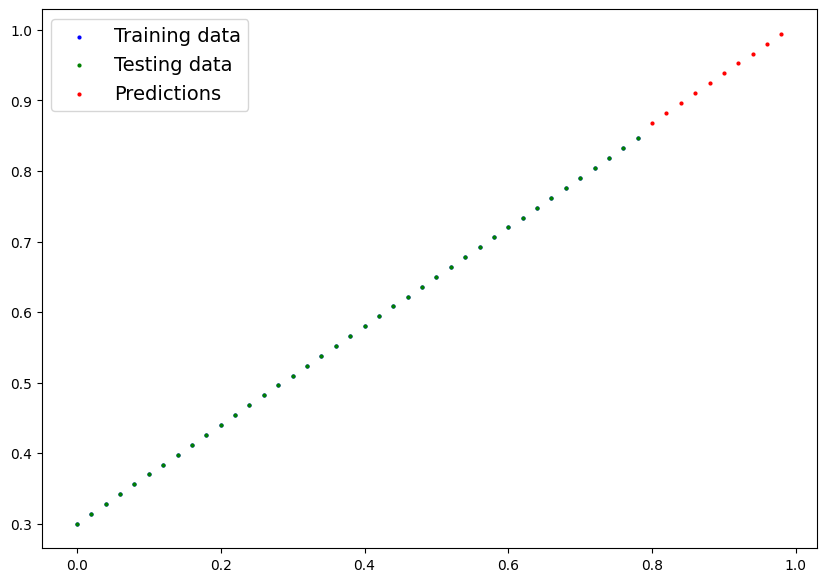

In [29]:
plot_predictions(predictions = y_preds_new)

#**51-54 Saving and loading a model**

3 methods to save/load a model, we will just go over the most popular one

In [30]:
from pathlib import Path

# 1.Create models directory

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok = True)

# 2.Create model save path

MODEL_NAME = "Chapter1_my_first_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Saving models state_dict()

torch.save(obj= model_0.state_dict(),
           f = MODEL_SAVE_PATH)


In [31]:
# To load

loaded_model_0 = LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(f = MODEL_SAVE_PATH))


<All keys matched successfully>

In [32]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])